In [1]:
import sympy
import control
import numpy as np
import matplotlib.pyplot as plt

# 1 Root Locus

In [2]:
def sympy_to_control(tf):
    s = sympy.symbols('s')
    num, den = sympy.fraction(tf)
    num = sympy.poly(num, s)
    den = sympy.poly(den, s)
    n = np.array(num.all_coeffs(), dtype=float)
    d = np.array(den.all_coeffs(), dtype=float)
    return control.tf(n, d)

def rlocus(tf, *args, **kwargs):
    return control.rlocus(sympy_to_control(tf), *args, **kwargs)

def step_response(tf, *args, **kwargs):
    return control.step_response(sympy_to_control(tf), *args, **kwargs)

def forced_response(tf, *args, **kwargs):
    return control.forced_response(sympy_to_control(tf), *args, **kwargs)

def wrap_deg(angle):
    while angle > 180:
        angle -= 360
    while angle < -180:
        angle += 360
    return angle

def zpk(tf):
    s = sympy.symbols('s')
    num, den = sympy.fraction(tf)
    num = sympy.poly(num, s)
    den = sympy.poly(den, s)
    zeros = sympy.roots(num, multiple=True)
    poles = sympy.roots(den, multiple=True)
    Gzp = 1
    for z in zeros:
        Gzp *= (s - z)
    for p in poles:
        Gzp /= (s - p)
    k = sympy.simplify(tf/Gzp)
    return  zeros, poles, k
    
def root_locus_problem(G):
    s = sympy.symbols('s')
    zeros, poles, gain = zpk(G)

    print('\n====================================')
    print('Part 1')
    print('zeros:', zeros)
    print('poles:', poles)

    print('\n====================================')
    print('Part 2')
    n = len(poles)
    m = len(zeros)
    num_asymptotes = n - m
    print('num asymptotes:', n-m)

    if gain > 0:
        angle_start = 180
    else:
        angle_start = 0
        
    asymptotes = np.array([ wrap_deg((angle_start + 360*j)/num_asymptotes) for j in range(num_asymptotes)])
    print('asymptotes deg:', asymptotes)

    centroid = (np.sum(poles) -np.sum(zeros))/(n - m)
    print('centroid', centroid)

    print('\n====================================')
    print('Part 3: Break away/in')
    K = sympy.symbols('K', real=True)
    f_K = sympy.solve(K*G + 1)[0][K]
    break_away_in = sympy.solve(f_K.diff(s))
    print('candidate break awak/in', break_away_in)

    print('\n====================================')
    print('Part 4: Imaginary Crossing')
    omega = sympy.symbols('omega', real=True)
    G_jw = G.subs(s, sympy.I*omega).expand(complex=True).collect(sympy.I)
    print('re(G(j omega)):', sympy.re(K*G_jw).simplify(), '= -1')
    print('im(G(j omega)):', sympy.im(K*G_jw).simplify(), '= 0')
    omega = sympy.symbols('omega', real=True)
    print(sympy.solve(sympy.im((K*G).subs(s, sympy.I*omega)), omega))
    sol_omega = np.array(sympy.solve(sympy.im((K*G).subs(s, sympy.I*omega)), omega), dtype=float)
    try:
        omega_val = sol_omega[np.argwhere(sol_omega > 0)[0][0]]
        print('omega:', omega_val)
        K_val = sympy.solve(sympy.re((K*G_jw)).subs(omega, omega_val).simplify() + 1, K)[0]
        print('K:', K_val)
    except IndexError as e:
        print(e)
        print('no imaginary crossing')

    print('\n====================================')
    print('Part 5: Angle of Arrival/ Departure')
    arrival = {}
    departure = {}
    for i_s, s in enumerate(zeros):
        arrival[s] = angle_start
        for i_p, p in enumerate(poles):
            arrival[s] += wrap_deg(np.rad2deg(np.angle(complex(s - p))))
        for i_z, z in enumerate(zeros):
            if i_z == i_s:
                continue
            arrival[s] -= wrap_deg(np.rad2deg(np.angle(complex(s - z))))

    for i_s, s in enumerate(poles):
        departure[s] = angle_start
        for i_p, p in enumerate(poles):
            if i_p == i_s:
                continue
            departure[s] -= wrap_deg(np.rad2deg(np.angle(complex(s - p))))
        for i_z, z in enumerate(zeros):
            departure[s] += wrap_deg(np.rad2deg(np.angle(complex(s - z))))
    
    for k in arrival.keys():
        if arrival[k] > 180:
            arrival[k] -= 360
            
    for k in departure.keys():
        if departure[k] > 180:
            departure[k] -= 360
    
    # account for repeated poles/zeros
    num, den = sympy.fraction(G)
    zeros_mult = sympy.roots(num)
    poles_mult = sympy.roots(den)
    print(zeros_mult)
    print(poles_mult)
    for p in poles_mult.keys():
        n = poles_mult[p]
        departure[p] /= n

    for z in zeros_mult.keys():
        n = zeros_mult[z]
        arrival[z] /= n
    print('poles', poles)
    print('zeros', zeros)

    print('arrival: ', arrival)
    print('departure: ', departure)
    
    print('\n====================================')
    print('Part 6: Draw Root Locus')
    rlocus(G)

In [4]:
s = sympy.symbols('s')
G = 1/((s**2 + 2*s + 1)*(s + 2))
G

1/((s + 2)*(s**2 + 2*s + 1))


Part 1
zeros: []
poles: [-2, -1, -1]

Part 2
num asymptotes: 3
asymptotes deg: [ 60. 180. -60.]
centroid -4/3

Part 3: Break away/in
candidate break awak/in [-5/3, -1]

Part 4: Imaginary Crossing
re(G(j omega)): 2*K*(1 - 2*omega**2)/(omega**6 + 6*omega**4 + 9*omega**2 + 4) = -1
im(G(j omega)): K*omega*(omega**2 - 5)/(omega**6 + 6*omega**4 + 9*omega**2 + 4) = 0
[]
index 0 is out of bounds for axis 0 with size 0
no imaginary crossing

Part 5: Angle of Arrival/ Departure
{}
{-2: 1, -1: 2}
poles [-2, -1, -1]
zeros []
arrival:  {}
departure:  {-2: -180.0, -1: 90.0}

Part 6: Draw Root Locus


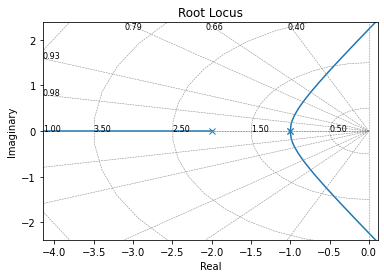

In [5]:
root_locus_problem(G)

In [6]:
G = -s/((s+1)*(s+2))
G

-s/((s + 1)*(s + 2))


Part 1
zeros: [0]
poles: [-2, -1]

Part 2
num asymptotes: 1
asymptotes deg: [0.]
centroid -3

Part 3: Break away/in
candidate break awak/in [-sqrt(2), sqrt(2)]

Part 4: Imaginary Crossing
re(G(j omega)): -3*K*omega**2/(omega**4 + 5*omega**2 + 4) = -1
im(G(j omega)): K*omega*(omega**2 - 2)/(omega**4 + 5*omega**2 + 4) = 0
[0]
index 0 is out of bounds for axis 0 with size 0
no imaginary crossing

Part 5: Angle of Arrival/ Departure
{0: 1}
{-1: 1, -2: 1}
poles [-2, -1]
zeros [0]
arrival:  {0: 0.0}
departure:  {-2: 0.0, -1: 180.0}

Part 6: Draw Root Locus


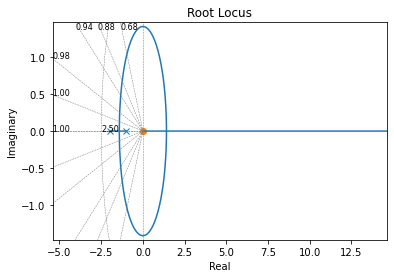

In [7]:
root_locus_problem(G)

In [9]:
G = 1/(s**2 + 4)
G

1/(s**2 + 4)

In [11]:
s_d = -4 + 2*sympy.I

In [13]:
sympy.arg(G.subs(s, s_d))

pi/4

In [16]:
360-315

45

In [17]:
K_PD = 8*(s+2)

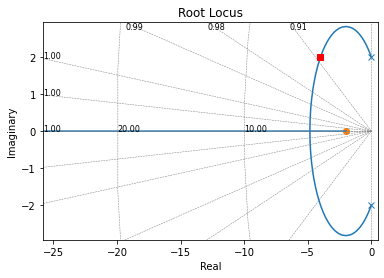

In [23]:
rlocus(G*K_PD);
plt.plot(-4, 2, 'rs')

In [26]:
sympy.simplify((G*K_PD).subs(s, s_d))

-1

In [27]:
K_PI = 1.002*(s + 0.01)/s

In [36]:
(K_PI*K_PD).expand()

8.016*s + 16.11216 + 0.16032/s

In [38]:
K_PI

(1.002*s + 0.01002)/s

In [41]:
G = -(s-1)/(s*(s+1))
G

(1 - s)/(s*(s + 1))

In [42]:
s_d = -1 + 1j

In [46]:
sympy.N(sympy.arg(G.subs(s, s_d))*180/sympy.pi)

108.434948822922

In [47]:
180 - sympy.N(sympy.arg(G.subs(s, s_d))*180/sympy.pi)

71.5650511770780

In [65]:
K_lead = 2*(s+1)/(s+4)

In [66]:
sympy.N(
    sympy.arg(K_lead.subs(s, s_d))*180/sympy.pi)

71.5650511770780

In [67]:
sympy.Abs((K_lead*G).subs(s, s_d))

1.00000000000000

In [72]:
K_lag = 1.015*(s + 0.04)/(s + 0.01)
Kv = sympy.Abs((s*G*K_lead*K_lag).subs(s, 0))
Kv

2.03000000000000

In [79]:
K_lead

(2*s + 2)/(s + 4)

In [82]:
(K_lead*K_lag).factor(s)

2.03*(1.0*s + 0.04)*(s + 1)/((1.0*s + 0.01)*(s + 4))